# Introduction

For this project, we were to identify the best neighborhood in Pittsburgh. Since 'bestness' is so vague, we decided to identify the best neighborhood according to how ideal it is for cycling. We then decided on three metrics, street signs for safety, traffic count to analyze congestion on the roads, and public art for scenery. We wanted to analyze the "best cycling" neighborhood with very different metrics, so we found that safety, congestion/enjoyability, and aesthetic views were fitting for this. When narrowing down data sets, we had considered including a speed hump data set since speed humps can greatly hinder the enjoyability of cycling. However we found out that the majority of the neighborhoods either had no speed humps, or had no data on their speed humps, so we decided to disclude it. Despite this, we believe we narrowed down the data sets and chose the three most fitting ones for determining the best neighborhood in Pittsburgh. 

# Metric: Best Neighborhood for Cycling

To further explain the thought process behind cycling and our individual three metrics, we were considering to include data on safety, enjoyability, bike specific lanes, city bike rentals, road conditions, and many other factors. However due to constraints on what data sets we could find (mainly on wprdc.org), we decided that street signs was a fitting data set to gauge the safety level for cycling since cars speeds and traffic would be more regulated in areas with more street signs. Congestion can be analyzed through the traffic counts data set to further determine which areas are safer/more open to cycling. And the public art data set would gauge the amount of interesting scenery available to cyclists which would enhance the atmosphere of cycling. 



# First, Gauging the Public Art Count in Pittsburgh

To start, we have to import execute the basic pandas imports

In [1]:
#imports
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt



# Counting the Public Art

Next we have to open the public art csv file to read from. Since each row in the csv corresponds to a unique neighborhood neatly described in the neighborhood column, we can simply find the unique neighborhoods in the file then find how many instances of each there are. 

In [118]:
# load data into data frame
dfraw = pd.read_csv("publicart2.csv")


#creates new data frame for neighborhood and number of speedhumps

neighborhoodList=[]
art=[]


#finds each unique speed hump's neighborhood and adds it to data frame
for element in dfraw["neighborhood"].unique(): #loops through each unique neighborhood from the data frame
    neighborhoodList.append(element)
    art.append(dfraw['neighborhood'].value_counts()[element])
    
d = {'Neighborhood': neighborhoodList, 'Public Art': art}
df = pd.DataFrame(data=d)
#outputs
df.head(10)


,Neighborhood,Public Art
0,Oakwood,1
1,Elliott,3
2,Central Business District,27
3,Carrick,2
4,Brookline,2
5,South Side Slopes,3
6,Hazelwood,3
7,Highland Park,10
8,Squirrel Hill South,20
9,Perry North,2


# Map Visualization

To get a general sense of the comparison between each neighborhood, we made a heatmap to see which neighorboods had more public art pieces and their general locations. 

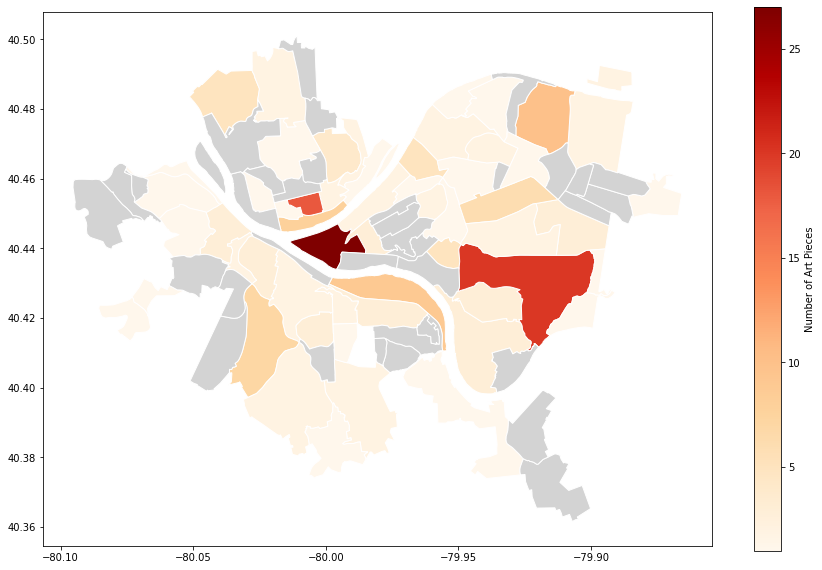

In [36]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile


# merges shape file and data frame
map2 = neighborhoods.merge(df, how='left', left_on='hood', right_on='Neighborhood')


# draw a choropleth map using data 
map2.plot(column='Public Art', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Art Pieces"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


    



Seemingly heavily concentrated in only a few neighborhoods as seen in the saturated red zones while many other areas have zero art pieces(depicted by the grey zones). Central Business District, Squirrel Hill South, and Alleghany Center performed the best.

# Bar Graph

To more easily see the numerical comparisons, it is clear that the top contenders are Central Business District, Squirrel Hill South, and Alleghany Center are the most prominent while the 4th place is half that of third.

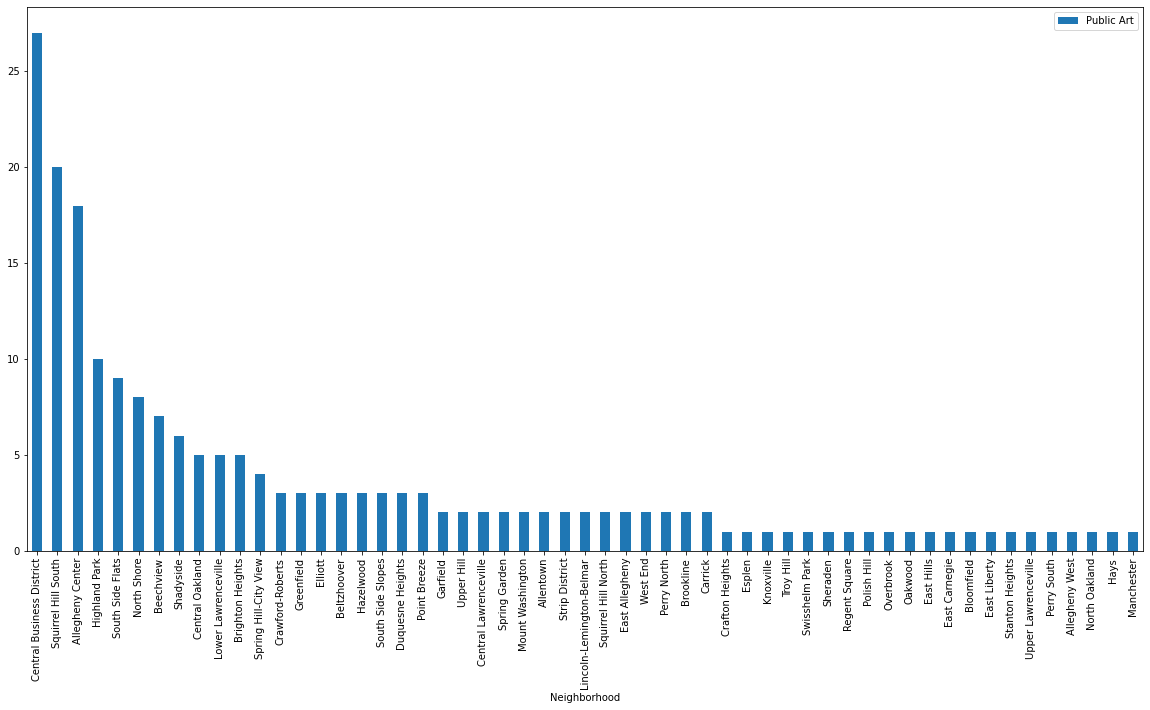

In [37]:
dfSorted=df
dfSorted=dfSorted.sort_values(by='Public Art', ascending=False)
dfSorted.plot.bar(x="Neighborhood", y="Public Art",rot=90, figsize=(20,10))

From the data, we can see that the distribution sorted from highest to lowest is heavily skewed. Therefore when adding together our metrics, it could the scaling could become awkward, so we will try finding a ratio between the number of public art pieces with the size of the neighborhood. We also that that an important part of seeing the public art is not just how many there are, but also how far away they are from each other.

# Neighborhood Size

We will get a csv containing the size of each neighborhood

In [38]:
dfSize = pd.read_csv("neighborhoodSize.csv")
dfSize=dfSize[["Neighborhood_2010_SQMILES", "SNAP_All_csv_Neighborhood"]] #keep only the neighborhood and neighborhood size columns since there were dozens of others that were irrelevant.
dfSize

,Neighborhood_2010_SQMILES,SNAP_All_csv_Neighborhood
0,0.281,Central Oakland
1,0.499,North Oakland
2,0.215,West Oakland
3,0.258,Crawford-Roberts
4,0.608,Strip District
...,...,...
85,0.132,Chartiers City
86,0.369,Ridgemont
87,0.200,West End
88,0.217,California-Kirkbride


# Compare Data to Find Ratio
Now we will use the first data frame to supply the number of public art pieces there are per neighborhood and divide that by the new neighborhood that has each neighborhoods' size in square miles.

In [39]:
sizeDict = dict(zip(dfSize.SNAP_All_csv_Neighborhood, dfSize.Neighborhood_2010_SQMILES))


ratio=[]
for element in dfraw["neighborhood"].unique():
    #dfCombined=dfCombined.append(pd.DataFrame([[element, dfraw['neighborhood'].value_counts()[element]/sizeDict[element]]], columns=["Neighborhood", "Public Art Pieces Per Square Mile : Ratio"])) #adds each neighborhood + its number of speed humps to NEW dataframe
    ratio.append(dfraw['neighborhood'].value_counts()[element]/sizeDict[element])

d2 = {"Neighborhood": neighborhoodList, "Public Art Pieces Per Square Mile : Ratio":ratio}
dfCombined = pd.DataFrame(data=d2)    
    
dfCombined

,Neighborhood,Public Art Pieces Per Square Mile : Ratio
0,Oakwood,3.968254
1,Elliott,4.950495
2,Central Business District,42.187500
3,Carrick,1.195457
4,Brookline,0.960615
5,South Side Slopes,4.189944
6,Hazelwood,1.895136
7,Highland Park,8.598452
8,Squirrel Hill South,7.487832
9,Perry North,1.650165


# Ratio Bar Graph Visualization

To easily see the number comparison for the art pieces to square mile ratio, we will form a bar graph.

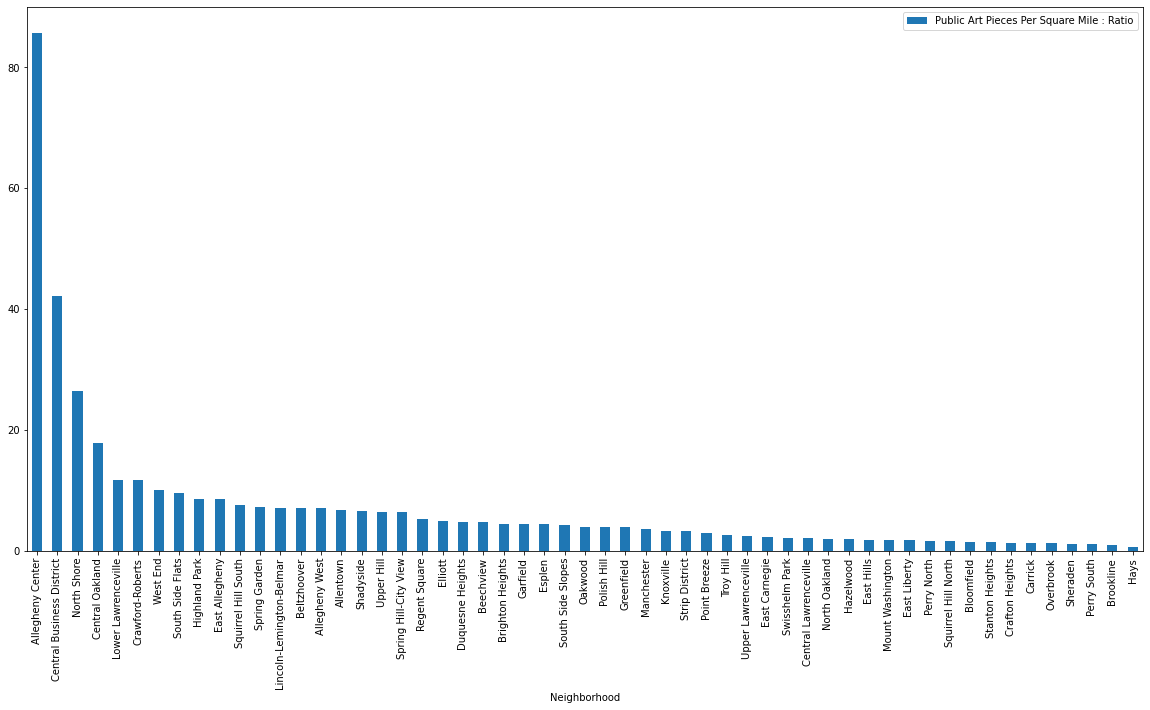

In [40]:
dfSortedCombined=dfCombined
dfSortedCombined=dfSortedCombined.sort_values(by='Public Art Pieces Per Square Mile : Ratio', ascending=False) # to sort the bar graph from greatest to least
dfSortedCombined.plot.bar(x="Neighborhood", y="Public Art Pieces Per Square Mile : Ratio",rot=90, figsize=(20,10))

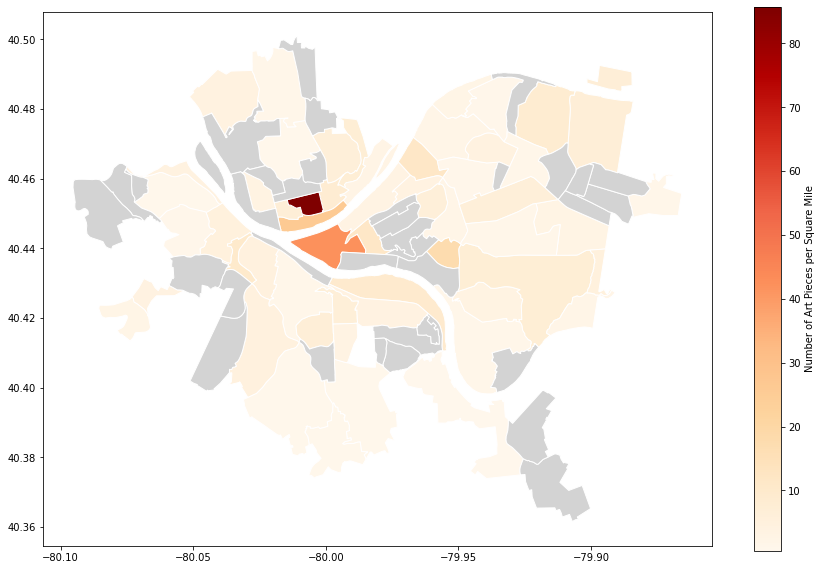

In [41]:
# merges shape file and data frame
mapCombined = neighborhoods.merge(dfSortedCombined, how='left', left_on='hood', right_on='Neighborhood')


# draw a choropleth map using data 
mapCombined.plot(column='Public Art Pieces Per Square Mile : Ratio', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Art Pieces per Square Mile"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


# For Comparison

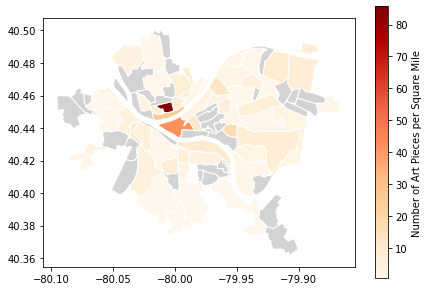

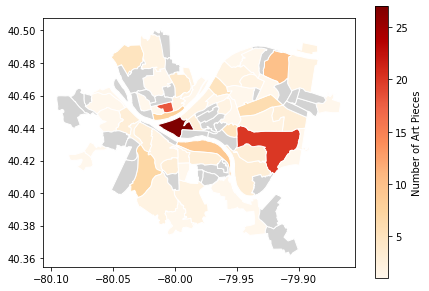

In [42]:
# draw a choropleth map using data 
mapCombined.plot(column='Public Art Pieces Per Square Mile : Ratio', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Art Pieces per Square Mile"}, # label the legend
               figsize=(7, 5),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

map2.plot(column='Public Art', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Art Pieces"}, # label the legend
               figsize=(7, 5),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )




# Public Art Summary

In terms of bestness when evaluating neighborhoods, it is quite evident that the Central Business District, North Shore, and Allegheny Center perform better in public art. However, many of the neighborhoods in Pittsburgh lack any public art while the majority have a few. Yet as seen in the heat map, we can see that the darker shaded/saturated areas perform signficantly better with the amount of public art available. It is also interesting to note that such regions fall around the center/middle axis of the city. 
From the heat map, we can conclude that Alleghany Center is the best neighborhood for public art, thus is a contender for the best neighborhood for cycling. 

# -----------------------------------------------------------------------------------------------

# Street Sign Metric

First we will be looking into a street sign data set from the City of Pittsburgh that has a list with additional information of every sign within the city neighborhoods. To assure that the csv was imported correctly, the first 10 items of the data are displayed. This entire metric will have a focus on safety as a major factor for the quality of cycling in one neighborhood versus another. This will be determined through the quantity of street signs found per neighborhood.

In [43]:
#Upload and display data
signs = pd.read_csv("StreetSigns.csv")

signs.head(10)

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,283941710,WF,1010,Middle St,Pittsburgh,Metal Pole,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,1858577624,WF,1107,Sherman Ave,Pittsburgh,Metal Pole,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,1338013353,WF,1010,Middle St,Pittsburgh,Wood Pole,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,208075892,WF,500,E North Ave,Pittsburgh,Wood Pole,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,565974481,R1-1,1434,N St Clair St,Pittsburgh,Wood Pole,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


# Street Sign Counts
Here, we will be finding the total counts of streets signs in each of the neighborhood districts. The data luckly labels each street sign with what neighborhood it is located in allowing for an easy finding of the counts. These counts are then displayed in a bar graph which gives a bit more of a visual of how the sign counts are distributed

South Side Flats             3672
Bloomfield                   3627
Central Business District    3491
Shadyside                    3370
Squirrel Hill South          3281
                             ... 
Ridgemont                      62
Chartiers City                 44
Glen Hazel                     38
Arlington Heights              21
Mount Oliver Borough           17
Name: neighborhood, Length: 91, dtype: int64


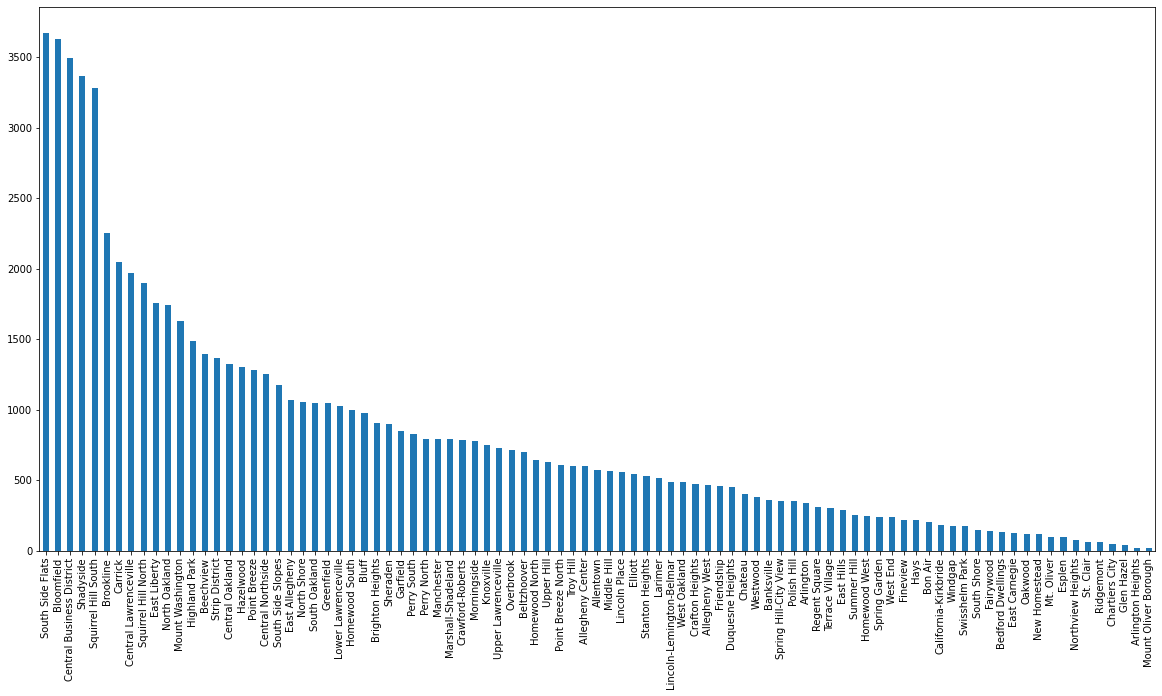

In [14]:
# Total count of all signs in each unique neighborhood
print(signs['neighborhood'].value_counts())
# Plots data in a bar graph
signs['neighborhood'].value_counts().plot.bar(figsize=(20, 10))


# Intial Analysis

From an intial look at the data, we can see that South Side Flats, Bloomfield, and Central Business District lead the overall counts. After taking a look at what kind of signs are actually recorded in the data, I found that many of them would have very little impact on the actual safety of cycling in the city, so I decided that it would be best to refine the data in some way.

# Refining the Data

I found that the best way to refine the data from it's current state would be to only look at certain kinds of signs out of the entire data set. The most impactful in regard to traffic out of all the signs recorded would have to be the stop sign. Because of this, I decided to only look at stop signs and remove all other kinds of signs from our analysis. Below is the process to removing all the excess signs and putting it into a new DataFrame

In [15]:
#Sort out all of the rows that do not represent a stop sign

stop_mask = signs['description'] == "Stop"
stopsigns = signs[stop_mask]

signsdata = dict()

for i in stopsigns.index:
    if stopsigns.neighborhood[i] not in signsdata:
        signsdata[stopsigns.neighborhood[i]] = 1
    else:
        signsdata[stopsigns.neighborhood[i]] = signsdata[stopsigns.neighborhood[i]] + 1
        

data_items = signsdata.items()
data_list = list(data_items)

# Puts the new dataframe into a desecnding order to see the neighborhoods with the highest # of stop signs
stoptable = pd.DataFrame(data_list)
stoptable.columns = ['Neighborhood', 'Stop Signs']
stoptable = stoptable.sort_values('Stop Signs', ascending=False).reset_index(drop=True)


display(stoptable)

,Neighborhood,Stop Signs
0,Brookline,349
1,Carrick,312
2,South Side Flats,292
3,Squirrel Hill South,257
4,Shadyside,228
...,...,...
87,Allegheny Center,8
88,St. Clair,6
89,South Shore,5
90,Arlington Heights,4


# Stop Sign Visualization 

Inorder to get a better visualization of the new Data Frame, it was put into a bar chart which only displays the top 10 in stop sign counts as that is the most important to our overall analysis of the best neighborhood to cycle in.

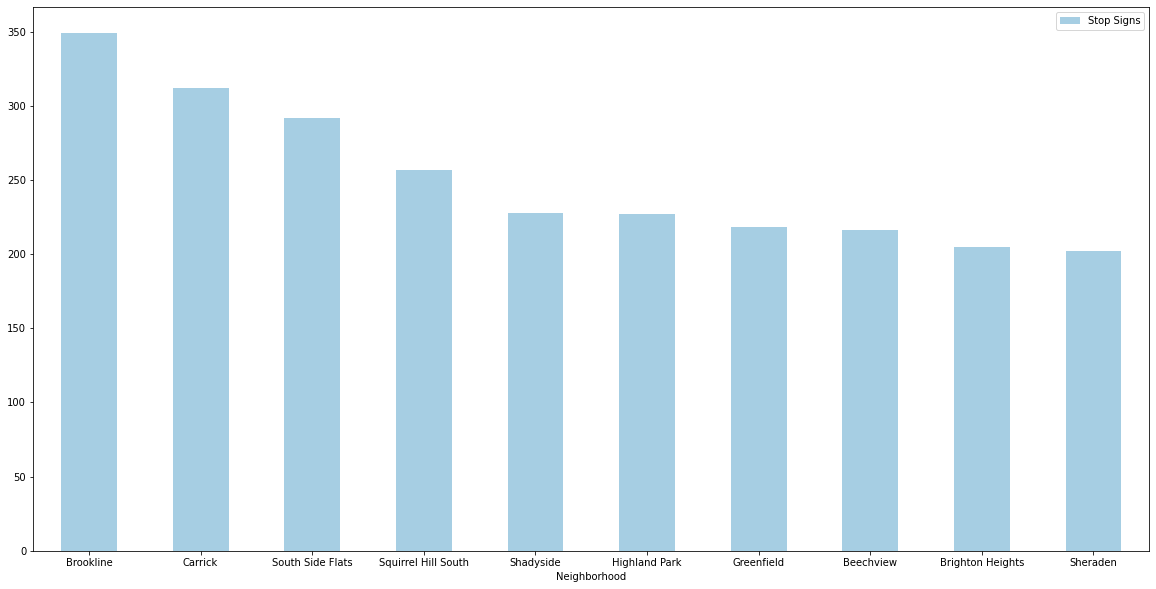

In [16]:
# Create ascending bar plot of the new stop signs dataset only showing the top 10
stoptable.sort_values('Stop Signs', ascending=False)[:10].plot.bar(x='Neighborhood', 
                                                                   figsize=(20, 10), 
                                                                   rot=0, 
                                                                   colormap='Paired')

# Stop Sign Analysis

After sorting out all other signs from the data and only looking at those with high counts of stop signs, it was found that the top 3 in counts are now Brookline, Carrick, and South Side Flats. This is much different than the previous top counts.

# Additional Geographic Visualization

In addition to the bar chart, I wanted to give a more geographical visualization of the new data frame which not only showed just the top 10, but all stop sign counts over a map of Pittsburgh. Below a pre created map and the stop sign data is merged together and put into a plot which highlights which neighborhoods have higher stop sign counts. The darker the shade of red, the more stop signs that are located in that area.

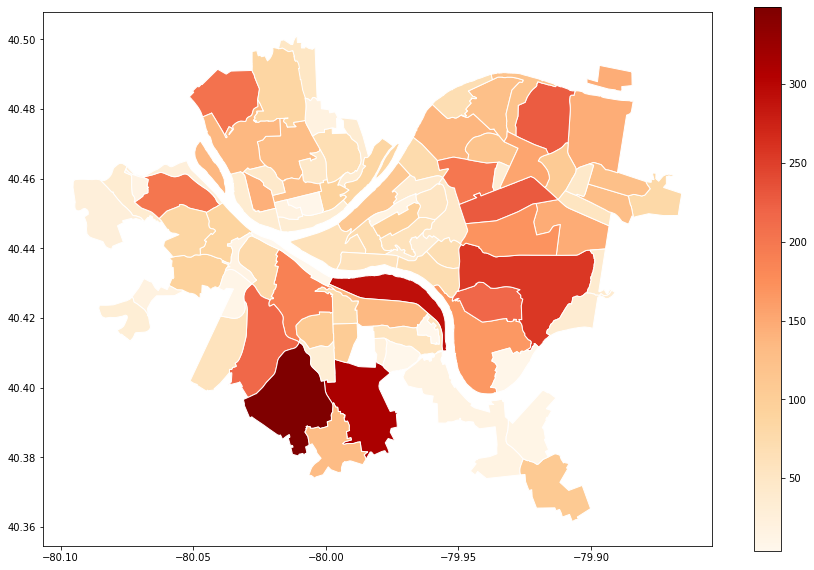

In [17]:
# Read Shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# merges shape file and data frame
map2 = neighborhoods.merge(stoptable, how='left', left_on='hood', right_on='Neighborhood')

# Creates a geoplot of the dataset on the neighborhoods of Pittsburgh
map2.plot(column='Stop Signs',
          edgecolor="white",
           legend=True,
          figsize=(15, 10),
          cmap='OrRd')

# Conclusion

After looking through the dataset with the perspective of safety when riding a bike in these areas. It was decided that the area with the highest quantity of stop signs would be deemed the "safest". More regulations on automobile traffic will lead to a more predictable enviorment in turn lessening the chance of a cycilist to getting ran over. Purely based off this metric, the top 10 neighborhoods for biking are:
1. Brookline
2. Carrick
3. South Side Flats
4. Squirrel Hill South
5. Shadyside
6. Highland Park
7. Greenfield
8. Beechview
9. Brighton Heights
10. Sheraden 

# -----------------------------------------------------------------------------------------------


# Traffic Count

The first thing we have to do when reviewing the Traffic Count in Pittsburgh is entering the the .csv file. Once we do that we check the first 5 values to make sure we have imported the correct file.

In [20]:
# load data into data frame
df = pd.read_csv("Traffic Count.csv")
df.head(5)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


Before we even attempt to visualize or adjust the dataset, we must first check for any and all null values present in the dataframe, and figure out a method in dealing with them.

In [21]:
# Tells you the amount of null values are in each column
df.isnull().sum()

id                              0
device_id                       0
record_oid                     45
count_start_date               53
count_end_date                 85
average_daily_car_traffic     134
average_daily_bike_traffic    413
counter_number                152
counter_type                   56
speed_limit                   159
max_speed                     329
median_speed                  122
percent_over_limit            179
speed85_percent               119
speed95_percent               129
longitude                       1
latitude                        1
neighborhood                    2
council_district                2
ward                            1
tract                           0
public_works_division           1
pli_division                    1
police_zone                     2
fire_zone                       1
dtype: int64

### Dealing with Null Values

Since there are some columns with hundreds of null values, the first thing we do is filter out all the columns we are not planning on using, leaving us with just the neighborhoods and the average traffic count. For this dataset, I chose to remove any rows after that containing null values since the cause of the null values was due to incomplete information gathering. Since the information was incomplete, it would be negligent to see them as a zero value, so removing them was the better option.

In [22]:
# Focus data into 2 columns
neighborhood = df[['neighborhood','average_daily_car_traffic']]
# Drop Null Values
neighborhood= neighborhood.dropna()

### Sort and compare traffic

Next, we group all the values into their respective neighborhoods, and assign them a value that contains the mean of all the traffic counts recorded for that respective neighborhood. It was then sorted in ascending order, since we want to find the neighborhood with the least traffic, and since the traffic difference grows at a fast rate, comparing the top 10 neighborhoods was significant in finding the most appropriate neighborhood.

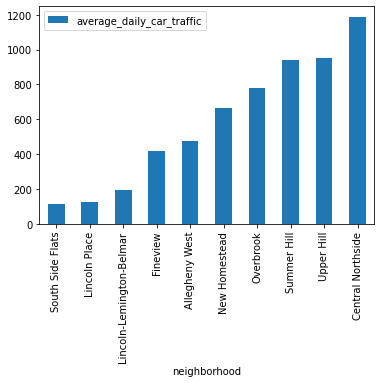

In [23]:
# Group by neighborhood and get average traffic count value, then sort in ascending order
neighborhood = neighborhood.groupby('neighborhood').mean()
neighborhood = neighborhood.sort_values(by=['average_daily_car_traffic'])
# Create bar plot to visualize difference
neighborhood.head(10).plot(kind='bar')

### Average speed limit

While traffic is an important factor in biking, it's alwasy important to check the average speed limit in these neighborhoods, so I compared the same 10 neighborhoods from earlier but added their average mph aswell to see if there was a difference.

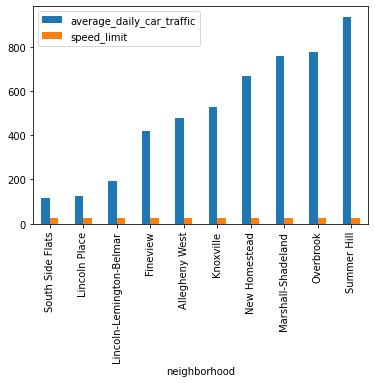

In [24]:
# Added speed limit column and cleaned/sorted it
hoodmph = df[['neighborhood','average_daily_car_traffic','speed_limit']]
hoodmph= hoodmph.dropna()
hoodmph = hoodmph.groupby('neighborhood').mean()
hoodmph = hoodmph.sort_values(by=['average_daily_car_traffic'])
hoodmph.head(10).plot(kind='bar')

### Map Visualization

In order to get a better representation of the traffic count of all the neighborhoods, we use a map visualization to account for every neighborhood, instead of the 10 least traffic-dense neighborhoods.

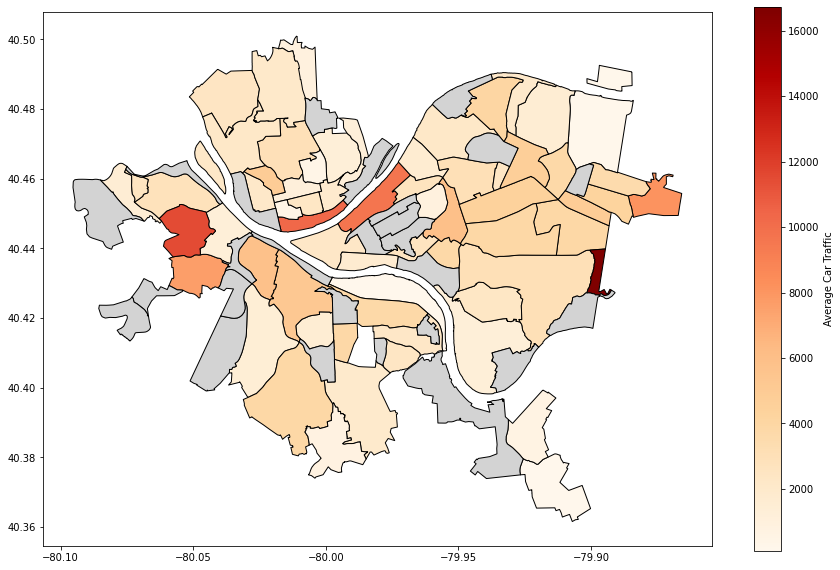

In [26]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

# Merges shape file and data file
map2 = neighborhoods.merge(neighborhood, how='left', left_on='hood', right_on='neighborhood')

#Creates Map Visualization, depicting each neighborhood and the respective data value
map2.plot(column='average_daily_car_traffic', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Average Car Traffic"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Create Ratio Visualization

Since it's clear from the map to see that many of the large neighborhoods have a medium traffic count, so in order to get a better representation of the traffic in the neighborhoods, I imported a neighborhood size data set. By dividing the traffic count by the square miles of the neighborhoods, we are given a ratio to represent the traffic density in each neighborhood to give a better depiction of how much traffic you will actually see.

In [28]:
# Import Neighborhood Snap Data set 
hoodSize = pd.read_csv("neighborhoodSize.csv",index_col = False)
#keep only the neighborhood and neighborhood size
hoodSize=hoodSize[["Neighborhood_2010_SQMILES", "SNAP_All_csv_Neighborhood"]] 
# Rename column name for simplicity
hoodSize = hoodSize.rename(columns={"Neighborhood_2010_SQMILES":"sq_miles","SNAP_All_csv_Neighborhood":"neighborhood"})
hoodSize

,sq_miles,neighborhood
0,0.281,Central Oakland
1,0.499,North Oakland
2,0.215,West Oakland
3,0.258,Crawford-Roberts
4,0.608,Strip District
...,...,...
85,0.132,Chartiers City
86,0.369,Ridgemont
87,0.200,West End
88,0.217,California-Kirkbride


In [29]:
#Merge Traffic Data set with Size Data set
combinedDf = pd.merge(neighborhood, hoodSize, on='neighborhood')
# Create ratio column by dividing traffic by square miles
combinedDf['ratio'] = combinedDf['average_daily_car_traffic'] / combinedDf['sq_miles']
# Sort in ascending order by ratio to find new lowest value for traffic
combinedDf = combinedDf.sort_values(by=['ratio'])
combinedDf = combinedDf[['neighborhood','ratio']]
combinedDf.head(10)

,neighborhood,ratio
0,South Side Flats,122.863248
1,Lincoln Place,128.048780
2,Lincoln-Lemington-Belmar,696.428571
11,Hazelwood,814.592546
5,New Homestead,838.790932
6,Overbrook,926.102503
14,Beechview,971.461187
39,Squirrel Hill South,1141.923221
21,Carrick,1177.269234
16,Highland Park,1345.428490


### Ratio Map Visualization

In order to get a better representation of the new traffic density of all the neighborhoods, we use a map visualization to account for every neighborhood and to see a more updated traffic count map, so we know the likelihood of finding traffic.

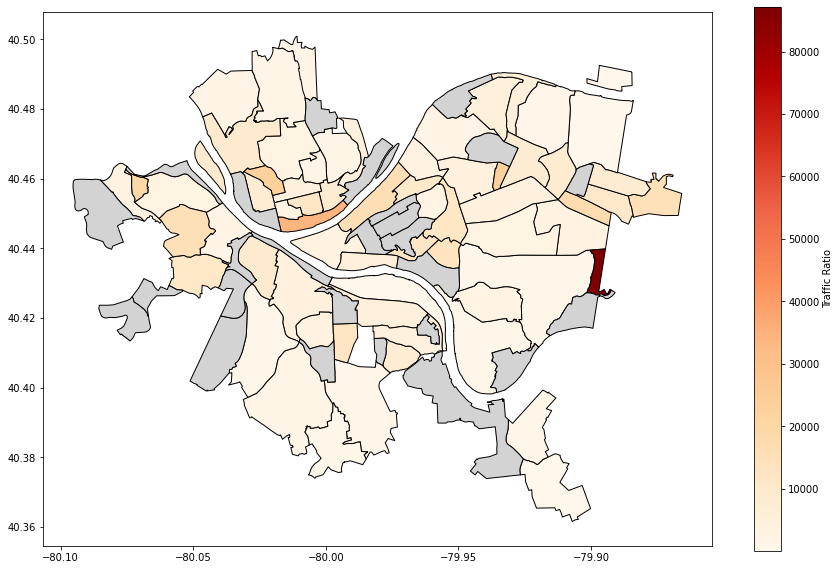

In [30]:
# Merge shape file with Ratio data set
finalmap = neighborhoods.merge(combinedDf, how='left', left_on='hood', right_on='neighborhood')

# Create new heat map depicting the traffic density in each neighborhood
finalmap.plot(column='ratio', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Traffic Ratio"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


## Conclusion

Based on the bar graphs showing us the numerical values of which neighborhoods have the least traffic density, and the heat maps to further those claims it is clear which neighborhoods are the safest to bike in based on how dense the traffic is in the neighborhoods.

1. South Side Flats
2. Lincoln Place
3. Lincoln-Lemington-Belmar
4. Hazelwood
5. New Homestead

When biking, the most dangerous thing isn't riding the bike, it's the other drivers around you being negligent in their surroundings. The best way to avoid that is tho

# -----------------------------------------------------------------------------------------------


# Combing Metrics

Next, we have to combine the three sub-metrics into one over-arching metric to determine the best neighborhood for cycling. However, since the results from each of our data sets do not use the same scale and don't lend well to combining without bias, we will have to implement a weighting for each sub metric. We decided to just normalize the data such that the highest value is 1 and the lowest is 0.

**Public Art**: As we've seen, the bar graph was heavily skewed with a low of around 1 and a high of around 85. Because of this, we decided to first lower the magnitude of these values by square rooting. 

In [53]:
scaledRatioArt=[]
scaledRatioArt2=[]
for num in ratio:
    scaledRatioArt.append(num**(1/2))

maxValue=max(scaledRatioArt)

for num in scaledRatioArt:
    scaledRatioArt2.append(num/maxValue)

d3 = {"Neighborhood": neighborhoodList, "Scaled Ratio":scaledRatioArt2}
dfScaled = pd.DataFrame(data=d3) 



For a general sense of what the distribution looks like now:

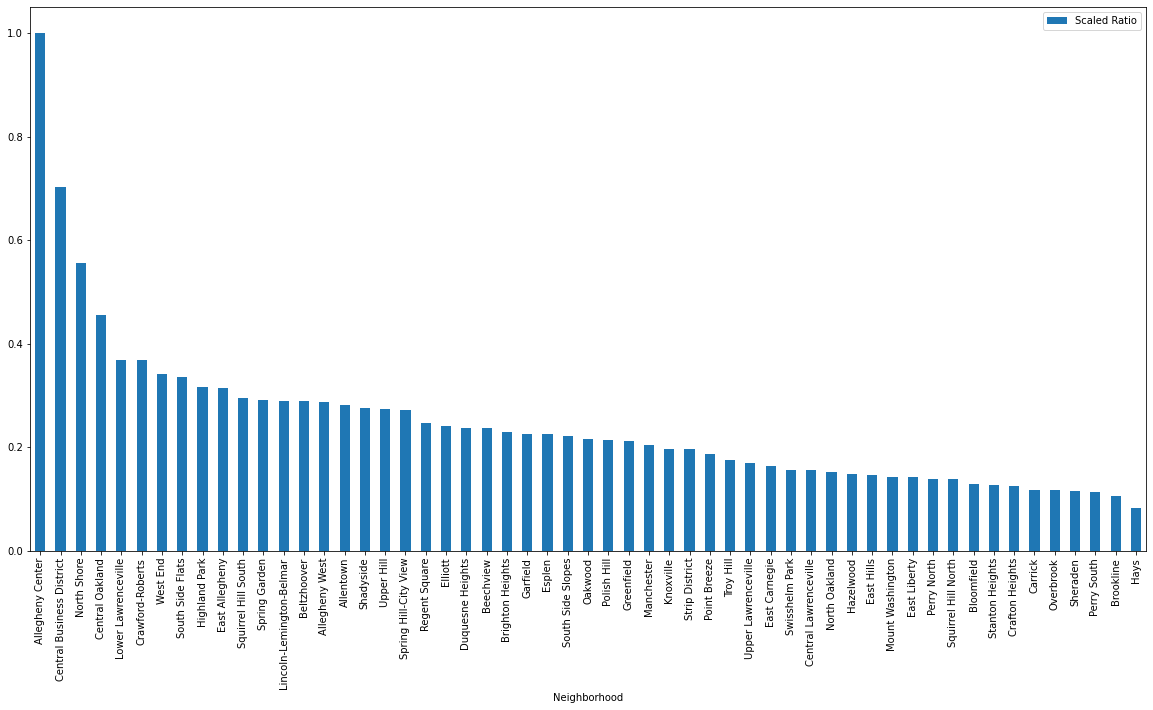

In [54]:
artScaledSorted=dfScaled
artScaledSorted=artScaledSorted.sort_values(by='Scaled Ratio', ascending=False) # to sort the bar graph from greatest to least
artScaledSorted.plot.bar(x="Neighborhood", y="Scaled Ratio",rot=90, figsize=(20,10))

# Next, to scale Street Sign Count

In [58]:
scaledRatiosigns=[]
scaledRatiosigns2=[]
for num in stoptable['Stop Signs']:
    scaledRatiosigns.append(num**(1/2))
    
maxValue=max(scaledRatiosigns)
for num in scaledRatiosigns:
    scaledRatiosigns2.append(num/maxValue)

d4 = {"Neighborhood": stoptable['Neighborhood'], "Scaled Ratio":scaledRatiosigns2}
dfScaledsigns = pd.DataFrame(data=d4) 


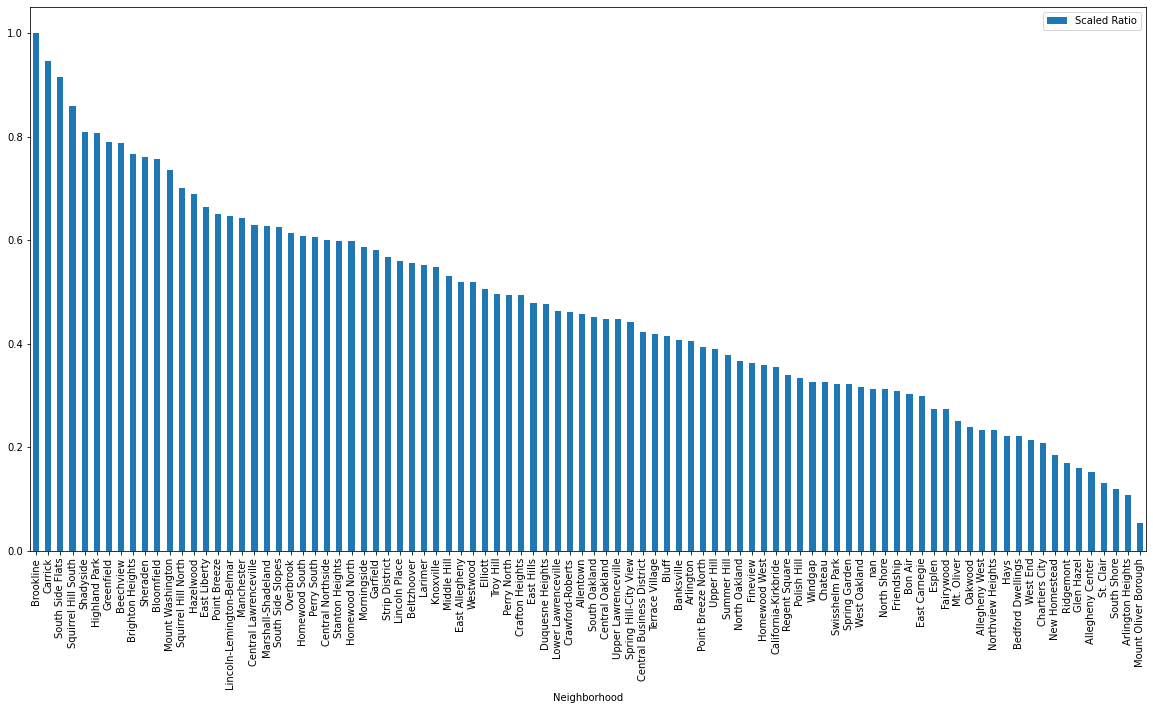

In [59]:
signScaledSorted=dfScaledsigns
signScaledSorted=signScaledSorted.sort_values(by='Scaled Ratio', ascending=False) # to sort the bar graph from greatest to least
signScaledSorted.plot.bar(x="Neighborhood", y="Scaled Ratio",rot=90, figsize=(20,10))

# Scaling Traffic
Since unlike the other metrics, a lower number for traffic means there's less congestion, thus is better for a cyclist to cycle. To accomodate this, we will subtract the normalized number from 1.

In [62]:
scaledRatioTraffic=[]
scaledRatioTraffic2=[]

for num in combinedDf['ratio']:
    scaledRatioTraffic.append(num**(1/2))
    
maxValue=max(scaledRatioTraffic)
    
for num in scaledRatioTraffic:
    scaledRatioTraffic2.append(1-num/maxValue)

d5 = {"Neighborhood": combinedDf['neighborhood'], "Scaled Ratio":scaledRatioTraffic2}
dfScaledTraffic = pd.DataFrame(data=d5) 

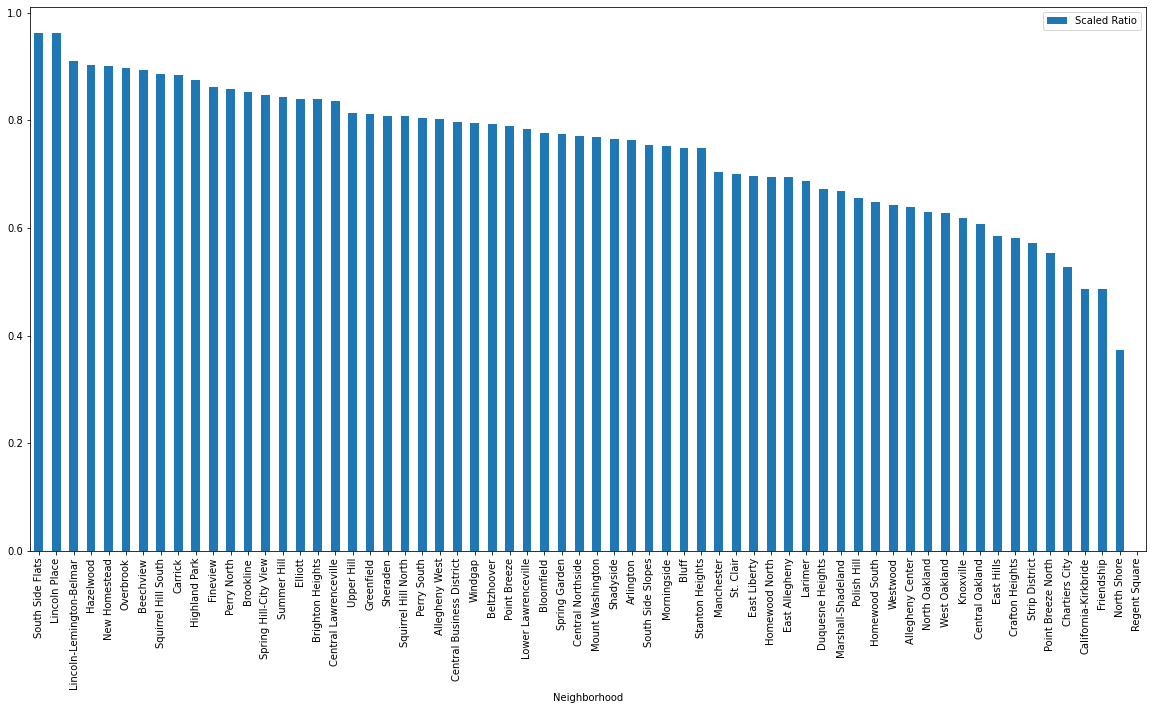

In [63]:
signScaledSorted=dfScaledTraffic
signScaledSorted=signScaledSorted.sort_values(by='Scaled Ratio', ascending=False) # to sort the bar graph from greatest to least
signScaledSorted.plot.bar(x="Neighborhood", y="Scaled Ratio",rot=90, figsize=(20,10))

# Combining the Data Frames

We first find the complete list of all neighborhoods since some of our data sets does not have any information on every neighborhood. For the sake of combining metrics, we will substitute any missing values with 0

In [76]:
totalNeighborhoodList = dfSize["SNAP_All_csv_Neighborhood"].tolist()

In [113]:
artDict=dict(zip(neighborhoodList, scaledRatioArt2))
signDict = dict(zip(stoptable['Neighborhood'], scaledRatiosigns2))
trafficDict=dict(zip(combinedDf['neighborhood'], scaledRatioTraffic2))

dictList=[artDict, signDict, trafficDict]

finalArtList=[]
finalSignList=[]
finalTrafficList=[]
finalScoreList=[]

for n in totalNeighborhoodList: # subsitutes 0s for neighborhoods not in the data set for each data set
    if n not in artDict:
        finalArtList.append(0)
    else:
        finalArtList.append(artDict[n])

for n in totalNeighborhoodList:
    if n not in signDict:
        finalSignList.append(0)
    else:
        finalSignList.append(signDict[n])

for n in totalNeighborhoodList:
    if n not in trafficDict:
        finalTrafficList.append(0)
    else:
        finalTrafficList.append(trafficDict[n])

# to combine the 3 metrics

for i in range(len(totalNeighborhoodList)):
    finalScoreList.append(finalArtList[i]+finalSignList[i]+finalTrafficList[i])


d6 = {"Neighborhood": totalNeighborhoodList, "Art Score":finalArtList, "Traffic Sign Score": finalSignList, "Traffic Score":finalTrafficList, "Final Score": finalScoreList}
dfFinalScores = pd.DataFrame(data=d6) 

dfFinalScores


,Neighborhood,Art Score,Traffic Sign Score,Traffic Score,Final Score
0,Central Oakland,0.455623,0.447854,0.607666,1.511142
1,North Oakland,0.152906,0.366975,0.629903,1.149783
2,West Oakland,0.000000,0.316680,0.628528,0.945208
3,Crawford-Roberts,0.368319,0.460472,0.000000,0.828791
4,Strip District,0.195901,0.566495,0.572277,1.334673
...,...,...,...,...,...
85,Chartiers City,0.000000,0.207316,0.527198,0.734514
86,Ridgemont,0.000000,0.169273,0.000000,0.169273
87,West End,0.341565,0.214115,0.000000,0.555680
88,California-Kirkbride,0.000000,0.355070,0.487024,0.842094


# Bar Graph Visualization

Now that we've combined the metrics, we want to more easily see which neighborhoods performed the best.

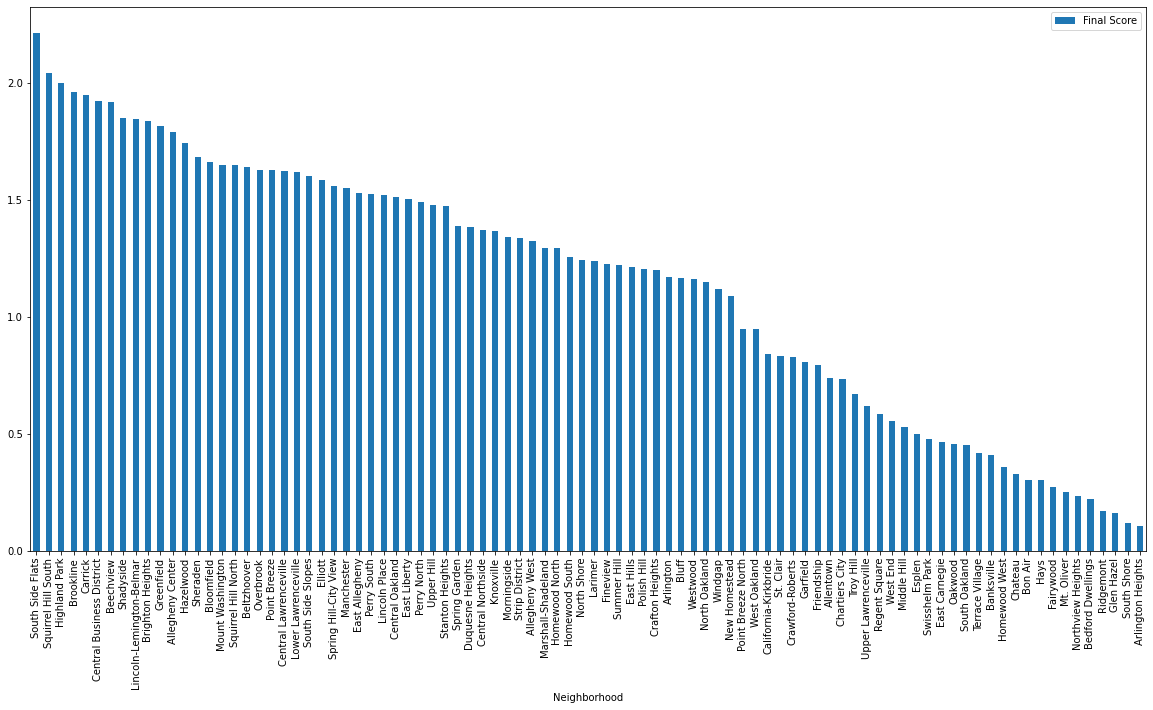

In [114]:
finalSorted=dfFinalScores.sort_values(by='Final Score', ascending=False) # to sort the bar graph from greatest to least
finalSorted.plot.bar(x="Neighborhood", y="Final Score",rot=90, figsize=(20,10))


finalSortedMap = neighborhoods.merge(finalSorted, how='left', left_on='hood', right_on='Neighborhood')



# Top 10 Neighborhoods

In [116]:
finalSorted.head(10)

,Neighborhood,Art Score,Traffic Sign Score,Traffic Score,Final Score
14,South Side Flats,0.334932,0.914700,0.962449,2.212081
25,Squirrel Hill South,0.295564,0.858132,0.885519,2.039214
37,Highland Park,0.316726,0.806492,0.875736,1.998954
42,Brookline,0.105864,1.000000,0.853105,1.958969
33,Carrick,0.118097,0.945507,0.883761,1.947365
5,Central Business District,0.701561,0.421486,0.796689,1.919736
41,Beechview,0.236508,0.786709,0.894409,1.917626
57,Shadyside,0.275689,0.808267,0.765606,1.849562
20,Lincoln-Lemington-Belmar,0.288675,0.646791,0.910597,1.846062
60,Brighton Heights,0.228524,0.766415,0.839226,1.834165


# Bottom 10 Neighborhoods

In [117]:
finalSorted.tail(10)

,Neighborhood,Art Score,Traffic Sign Score,Traffic Score,Final Score
46,Bon Air,0.00000,0.302804,0.0,0.302804
69,Hays,0.08165,0.220705,0.0,0.302354
84,Fairywood,0.00000,0.272944,0.0,0.272944
52,Mt. Oliver,0.00000,0.251072,0.0,0.251072
9,Northview Heights,0.00000,0.233327,0.0,0.233327
67,Bedford Dwellings,0.00000,0.220705,0.0,0.220705
86,Ridgemont,0.00000,0.169273,0.0,0.169273
89,Glen Hazel,0.00000,0.160586,0.0,0.160586
54,South Shore,0.00000,0.119694,0.0,0.119694
64,Arlington Heights,0.00000,0.107058,0.0,0.107058


# Conclusion

To recap, we chose to identify the best neighborhood in Pittsburgh as the one most ideal for cycling. The three aspects we considered were scenery, safety, and enjoyability by analyzing the Public Art, Traffic Sign, and Traffic data sets. As seen above, South Side Flats, Squirrel Hill South, and Highland Park are the top neighborhoods for cycling in Pittsburgh according to our three metrics whereass the bottom 3 are Arlington Heights, South Shore, and Glen Hazel.

**Chris Mohri:** I found it really interesting to see the top 5 scores. When seeing the results from the public art section, I thought that its top neighborhoods would be more represented in the final scores' top neighborhoods. But in the final results, the top scores actually did not perform all that well in terms of art, which is, I assume, attributed to the fact that the public art distribution was heavily skewed and the other distributions were more flat. As I am unfamiliar with most neighborhoods in Pittsburgh, I am impartial to South Side Flats winning. However I do wish that Central Business District performed better since it is one of my favorite areas in Pittsburgh. 